path
/Users/taruna/Desktop/publication/Data/impaired-cp/AOF0802R.csv
      LH.POS.x  LH.POS.y  LH.POS.z  LH.ROT.x  LH.ROT.y  LH.ROT.z  TH.POS.x  \
0      0.49230   0.28151 -0.069113   -178.55   -18.557   -24.319   0.51443   
1      0.49078   0.28199 -0.068936   -178.64   -19.765   -24.649   0.51443   
2      0.48925   0.28250 -0.068707   -178.74   -21.034   -24.979   0.51443   
3      0.48753   0.28301 -0.068453   -178.88   -22.372   -25.261   0.51443   
4      0.48577   0.28369 -0.068047   -179.02   -23.829   -25.575   0.51443   
...        ...       ...       ...       ...       ...       ...       ...   
1509   0.30813   0.27841  0.016866    168.56    -7.565    80.604   0.20930   
1510   0.30836   0.27826  0.016967    168.52    -7.544    80.597   0.20749   
1511   0.30813   0.27828  0.017272    168.48    -7.501    80.521   0.20556   
1512   0.30823   0.27795  0.017780    168.48    -7.493    80.429   0.20401   
1513   0.30808   0.27846  0.017348    168.41    -7.444    80.411   0.2025

/var/folders/fl/hgfqx2yn0zvccvvyw3mc3bh80000gn/T/ipykernel_63209/784786080.py:49: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Eigenvectors 
[[-2.22677149e-01 -3.91468736e-01  4.81050782e-01 -6.32749751e-05
   3.51229444e-01 -1.26636678e-01  2.39838600e-01 -3.65807559e-01
  -2.39536428e-01  4.10312439e-01  9.51455653e-02 -1.52933490e-02]
 [ 2.86701464e-01  4.06477153e-01 -2.94972365e-01  2.81447398e-02
  -2.16789903e-01 -2.37850566e-01  5.93895288e-01 -2.71040948e-01
  -1.08316410e-01  3.43366504e-01  3.61840630e-02  6.39524969e-02]
 [ 4.28588695e-01 -1.31107943e-01  2.07696769e-01 -1.53773352e-01
  -6.81698653e-02  2.00978223e-01 -7.59833160e-03  1.55108184e-01
  -3.49830765e-01  4.69726607e-02 -4.40925888e-01  5.86667668e-01]
 [ 3.40767956e-01  1.06988175e-01 -1.70723664e-01  3.59681752e-02
   5.24408467e-01 -1.66515095e-01 -2.18593986e-01 -2.05840777e-01
  -1.08144351e-01 -3.09364984e-02 -5.04374250e-01 -4.26684341e-01]
 [ 3.00826200e-01  1.03759217e-01 -1.68956670e-02 -5.58346069e-03
  -6.05524795e-02  6.53670142e-01 -3.33739968e-01 -2.68898161e-01
  -6.85003434e-02  3.65417012e-01  3.41824524e-01 -1.69455

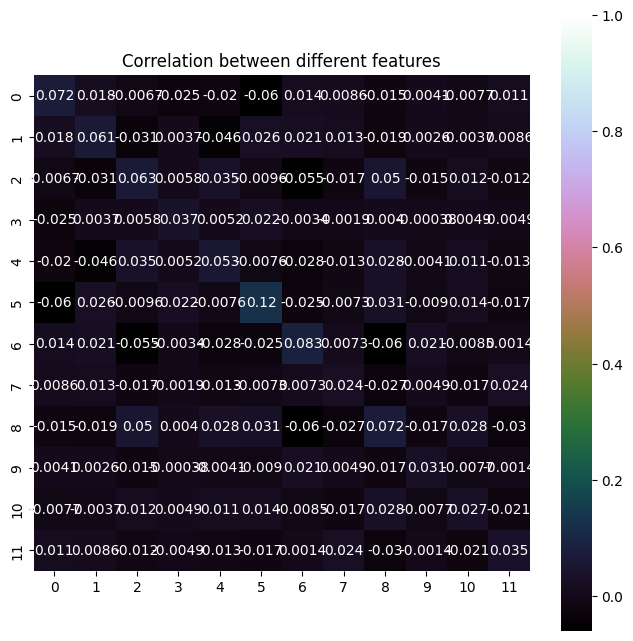

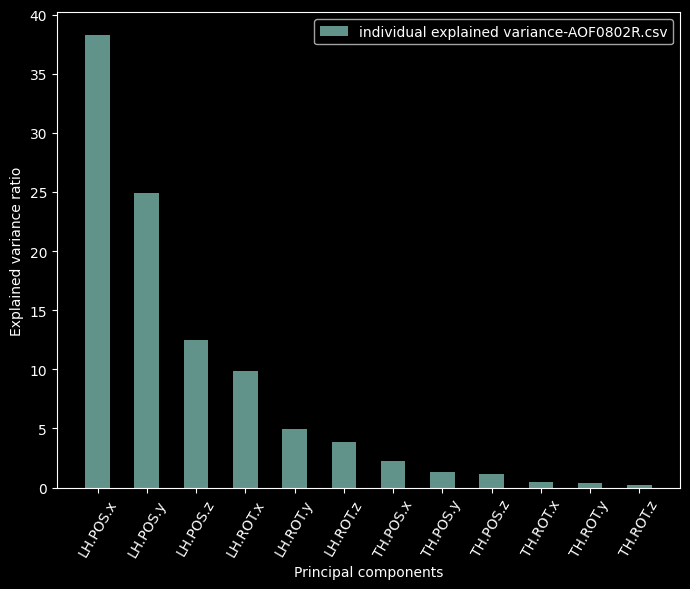

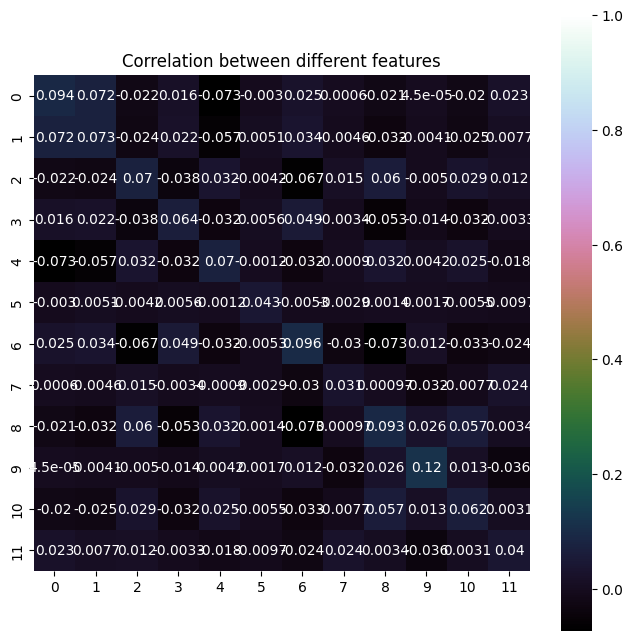

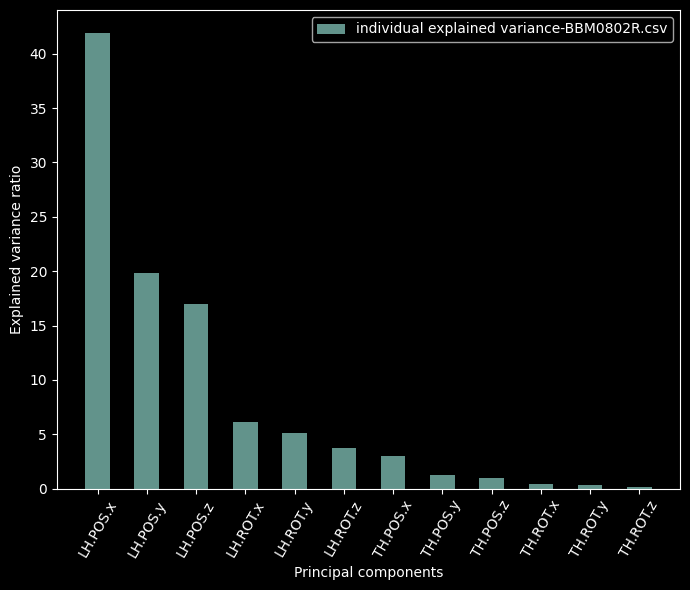

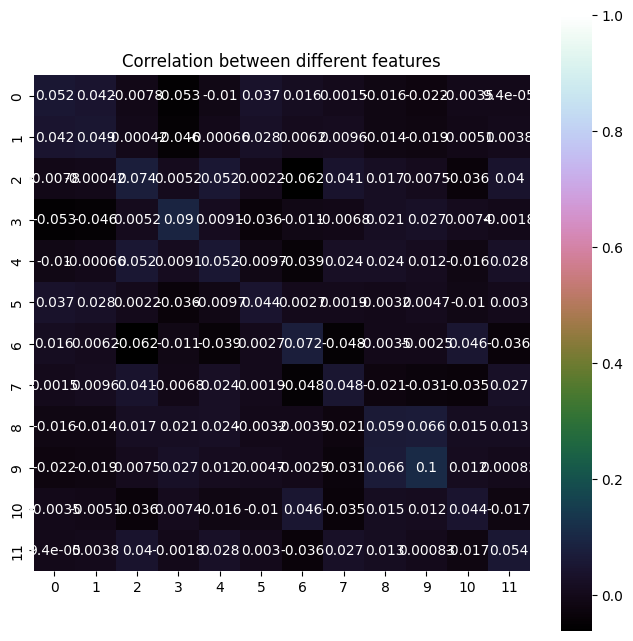

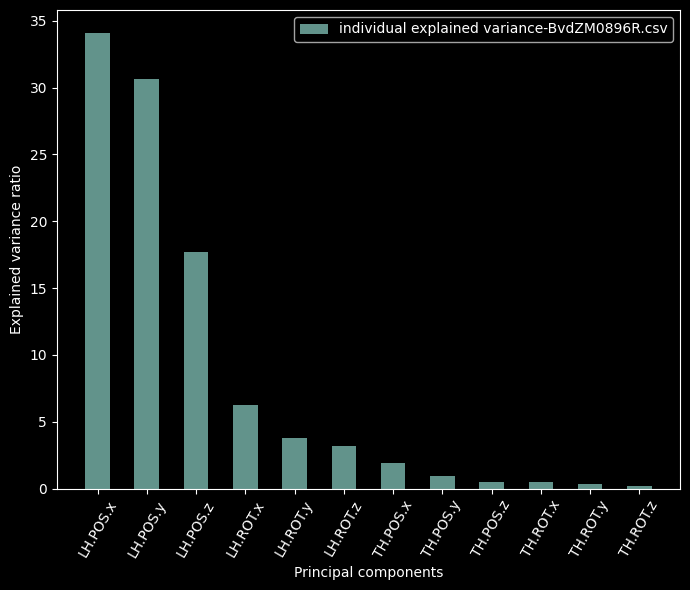

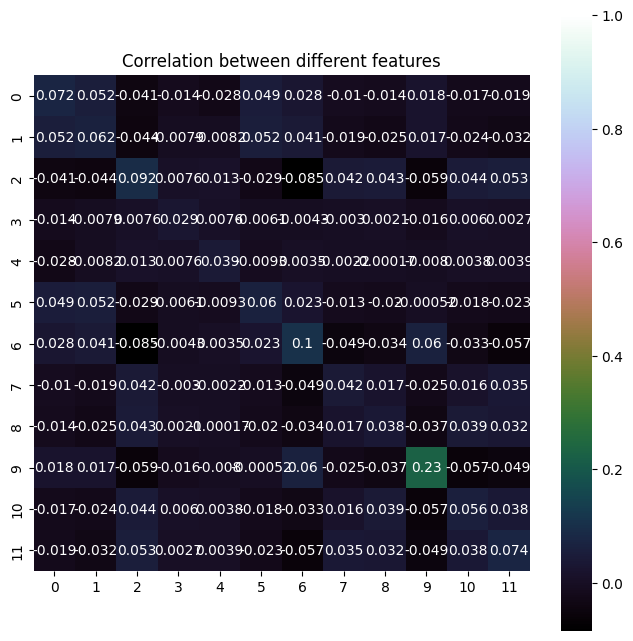

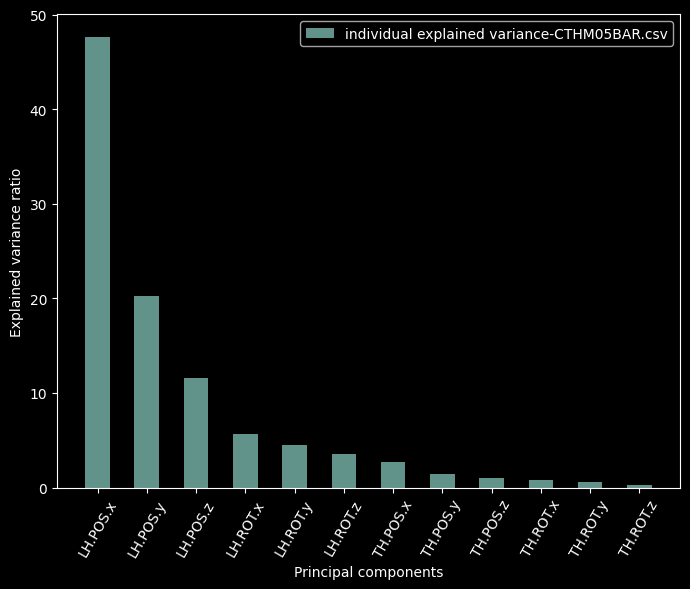

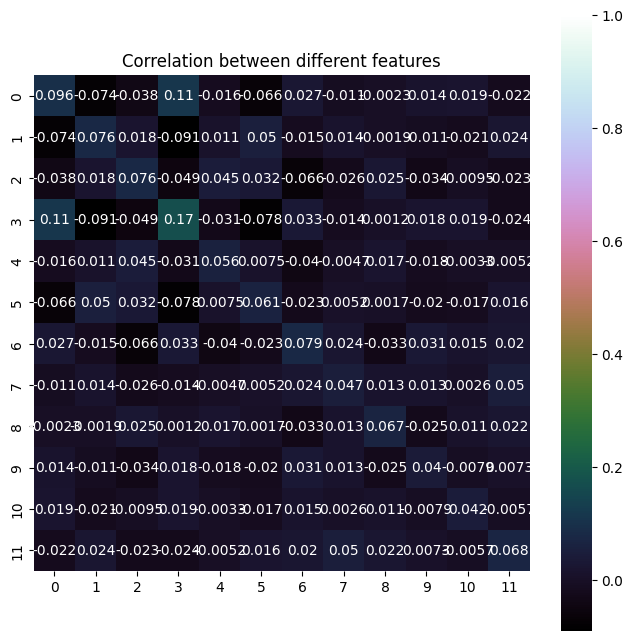

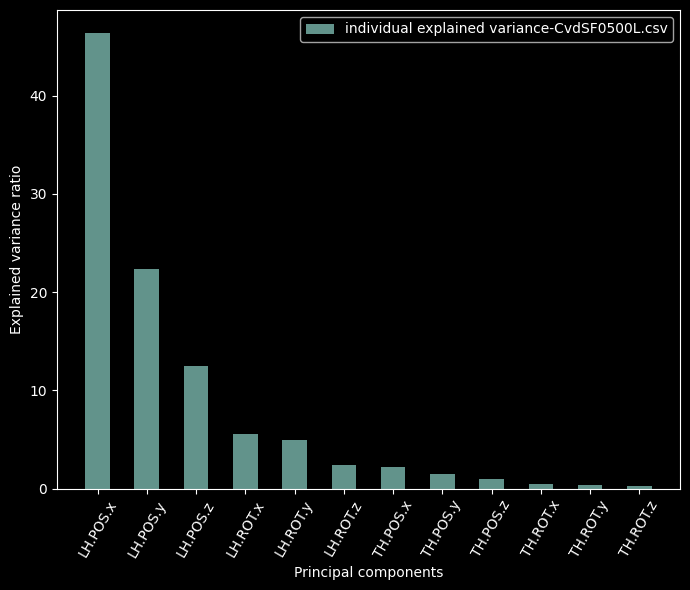

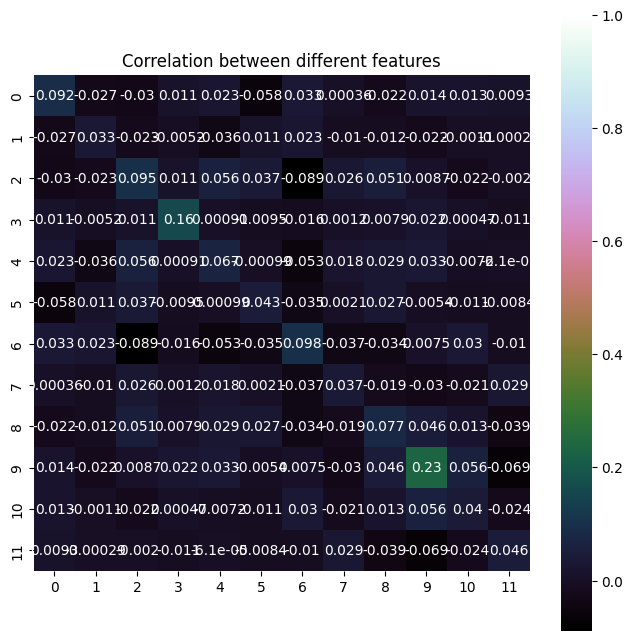

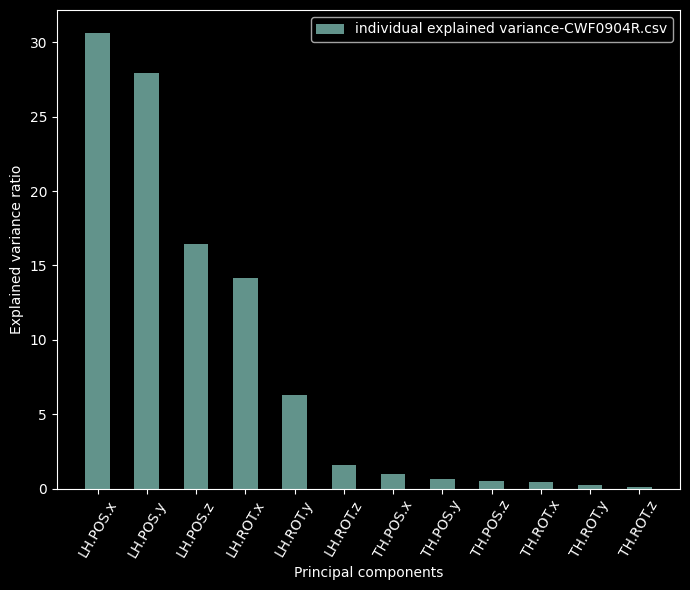

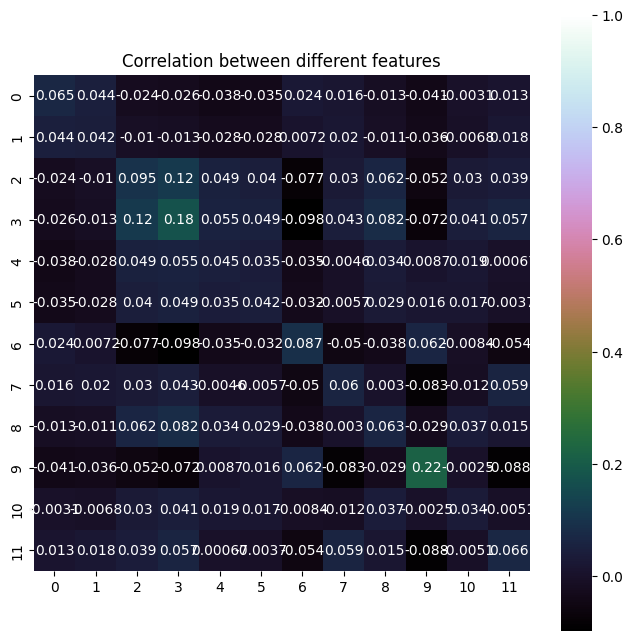

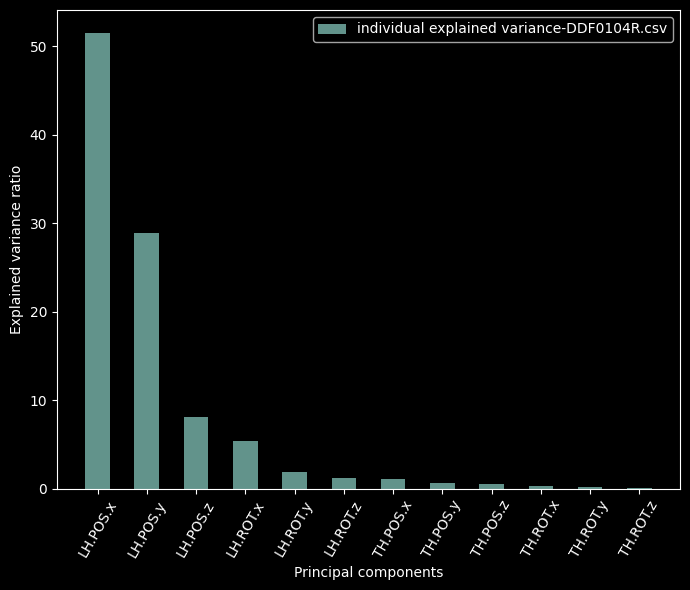

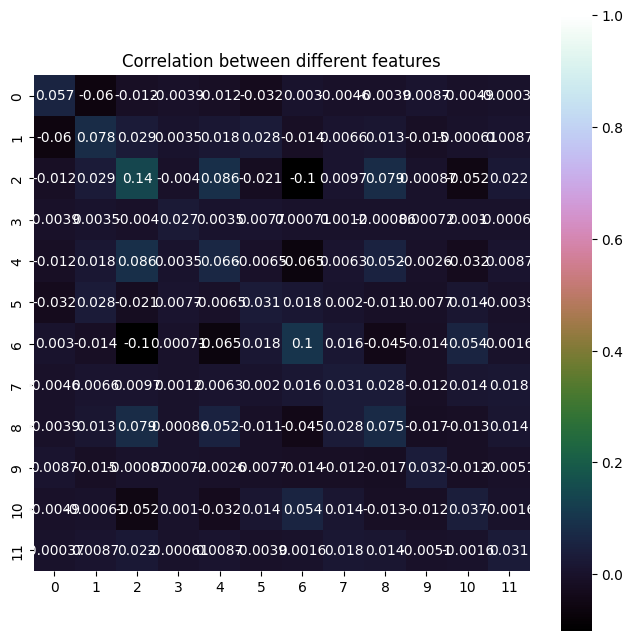

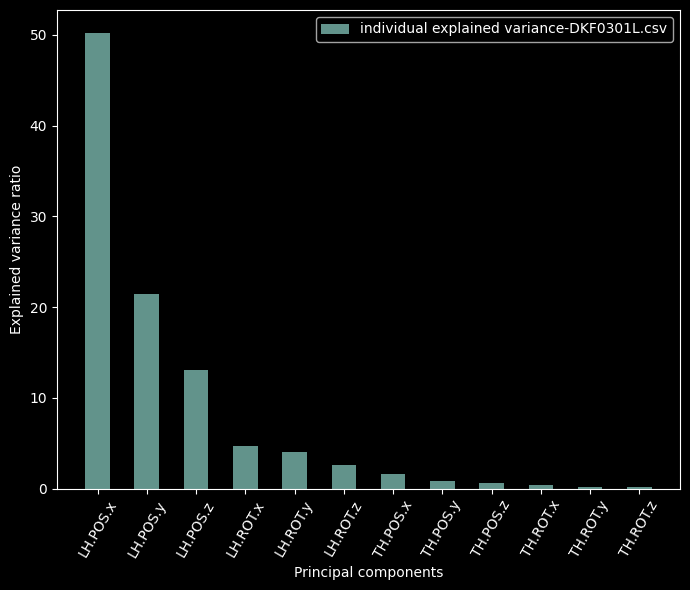

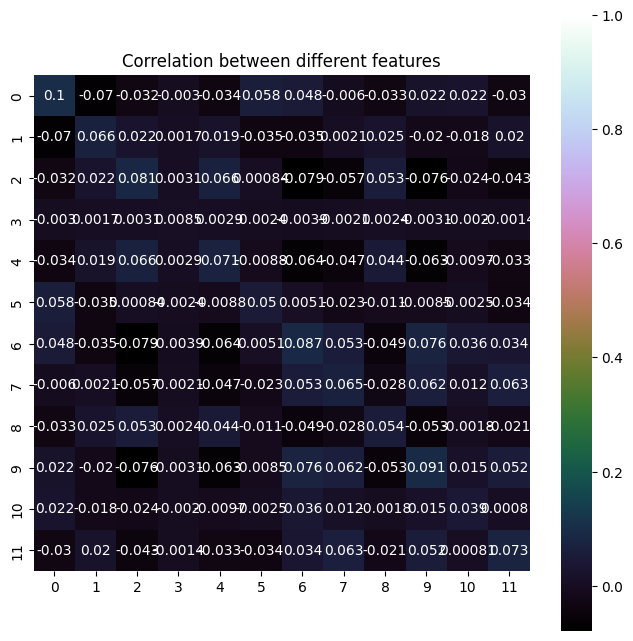

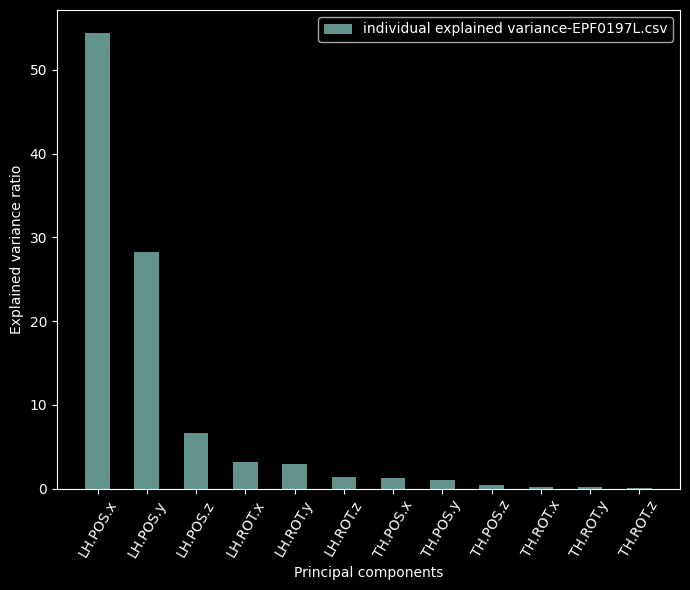

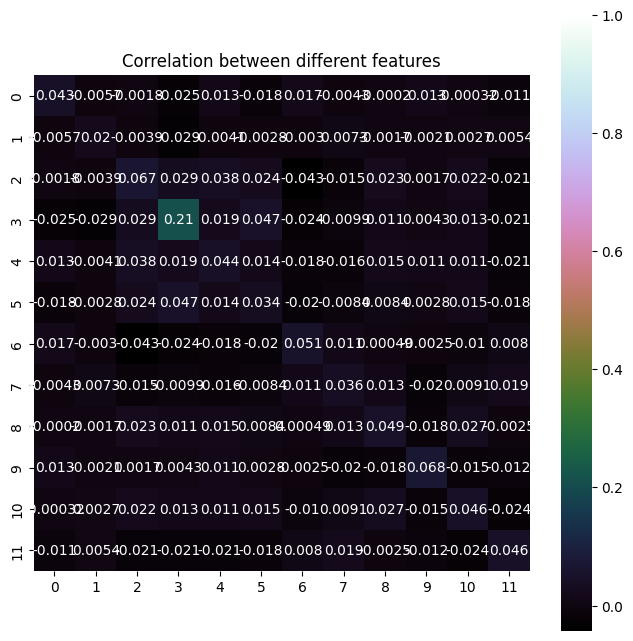

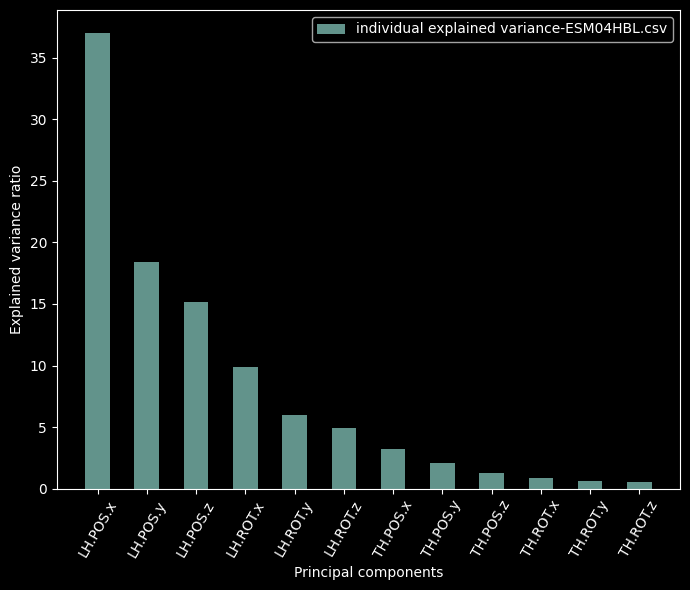

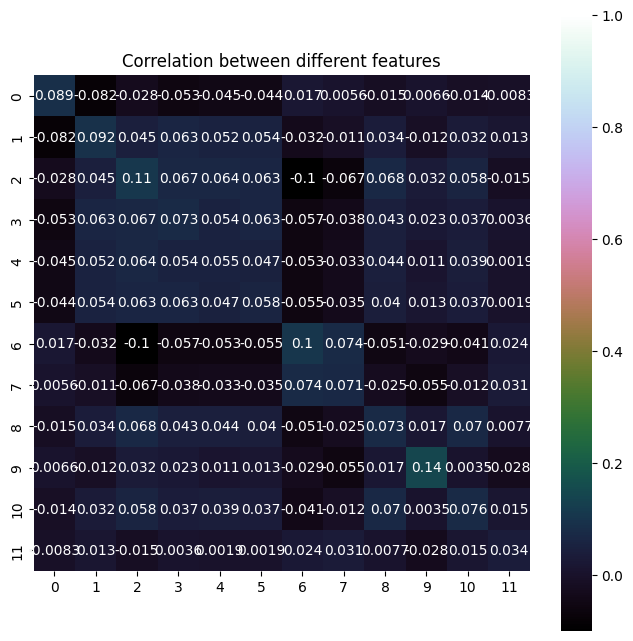

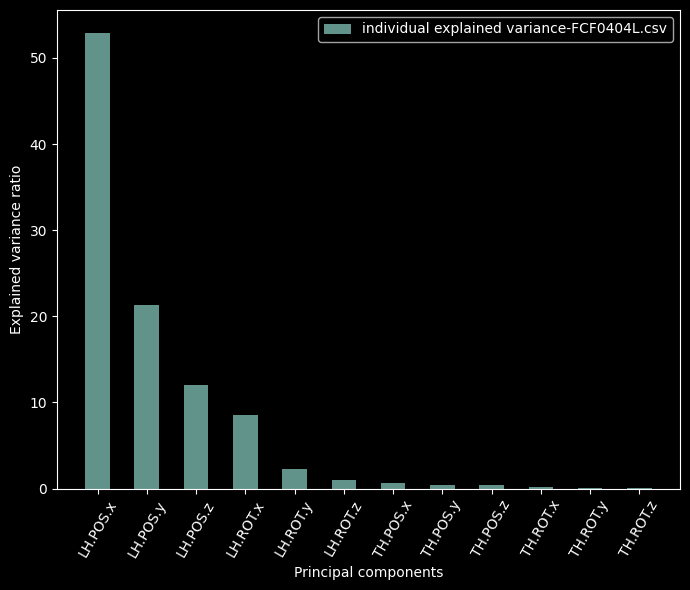

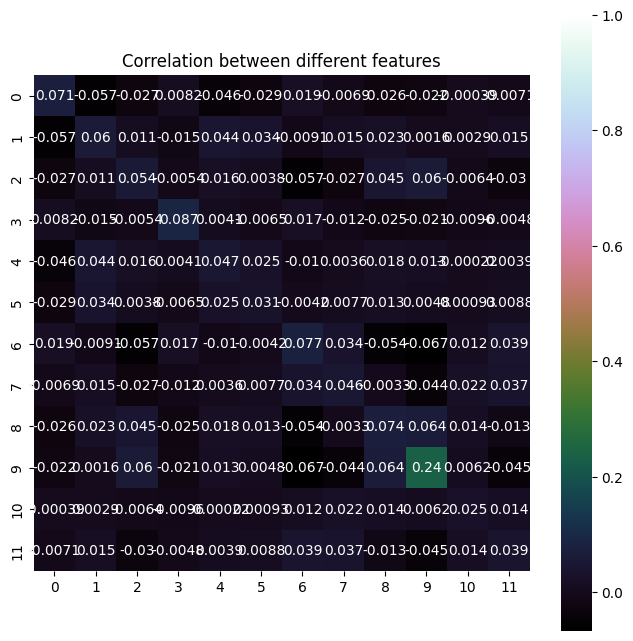

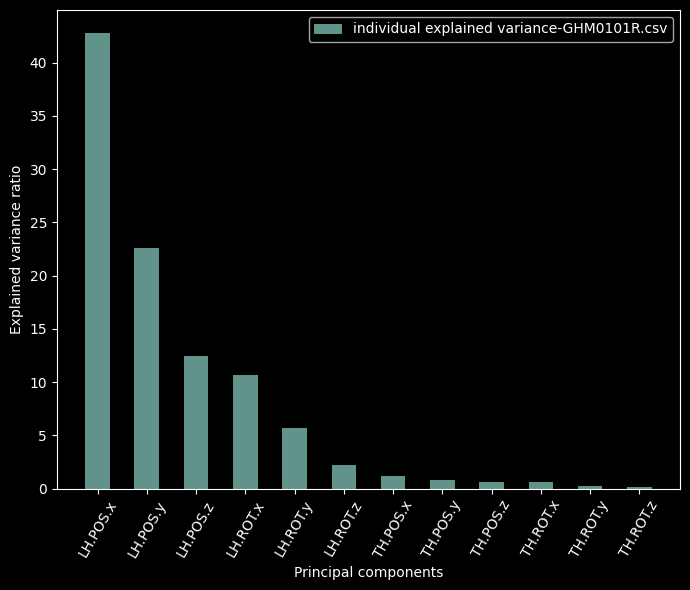

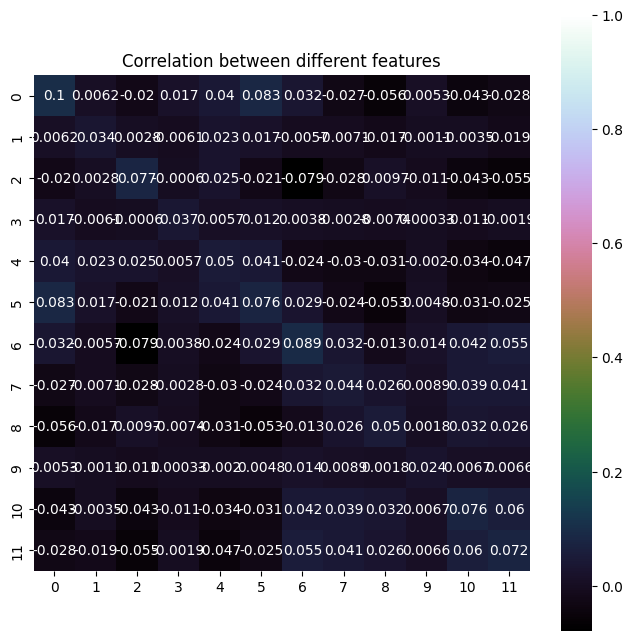

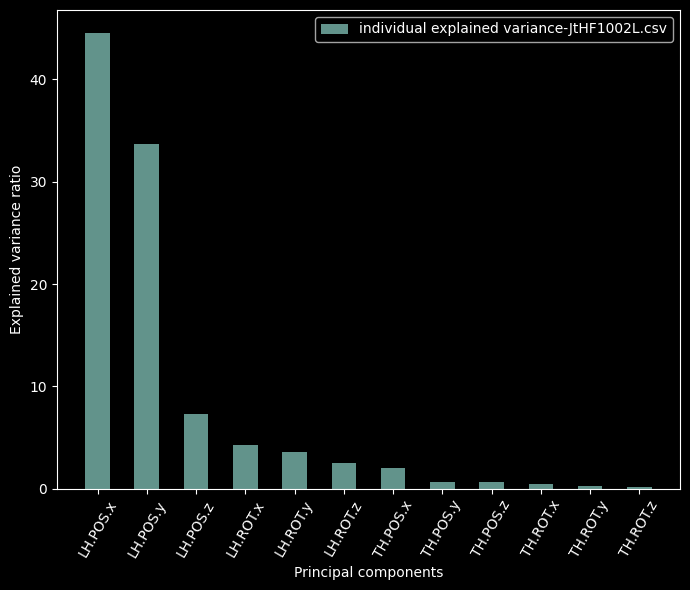

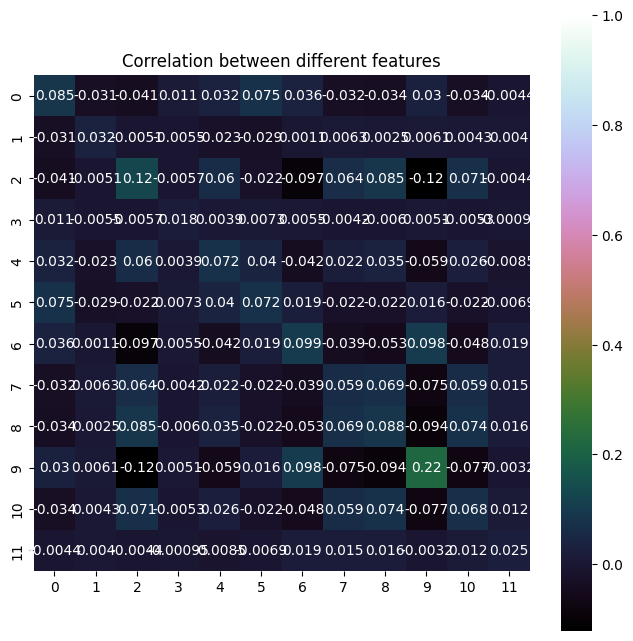

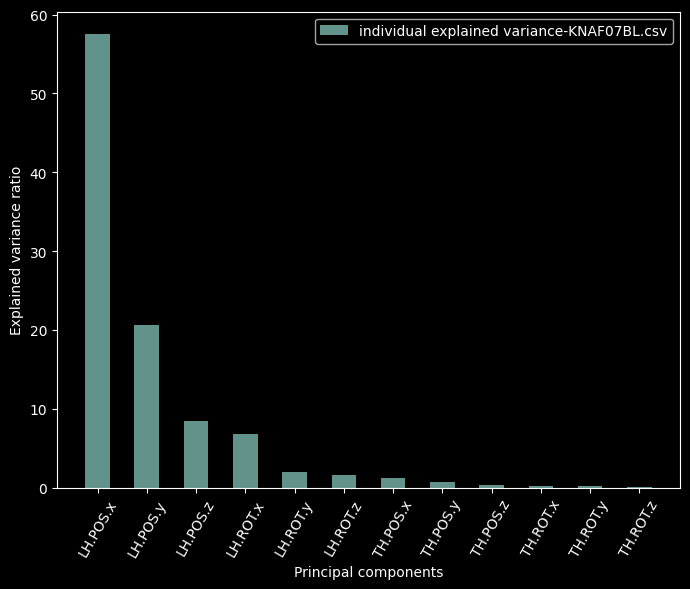

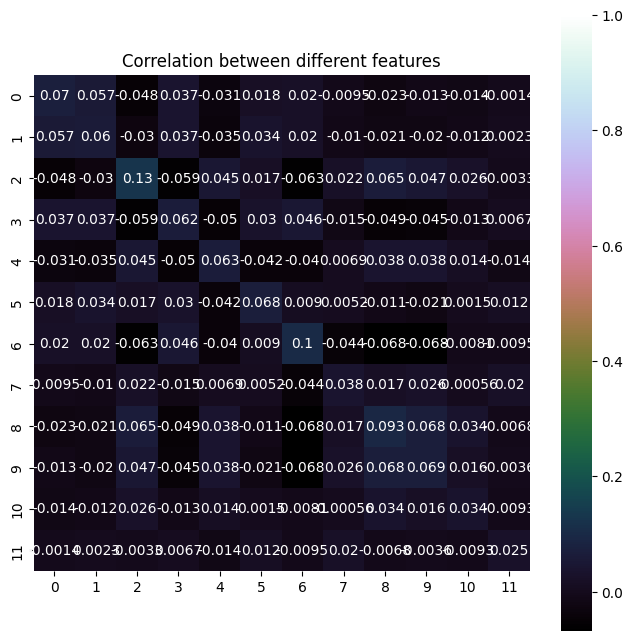

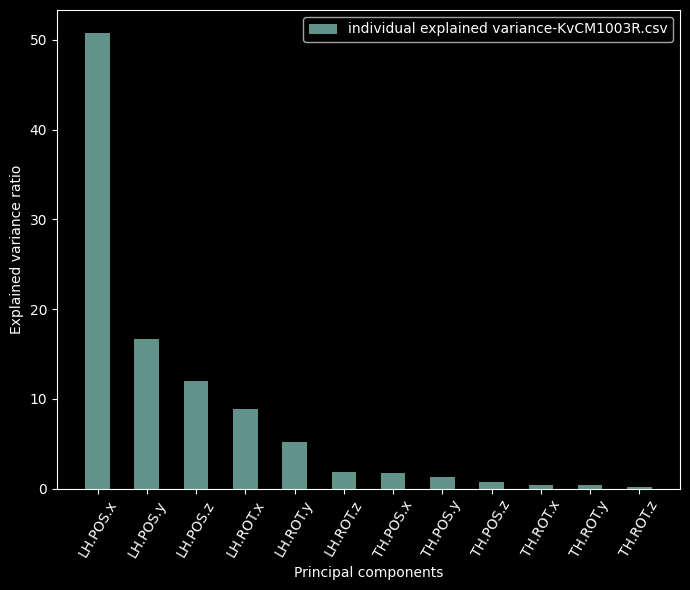

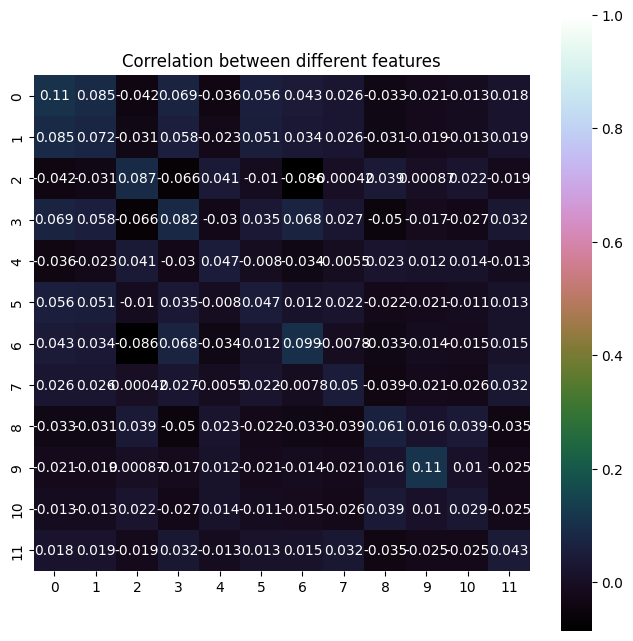

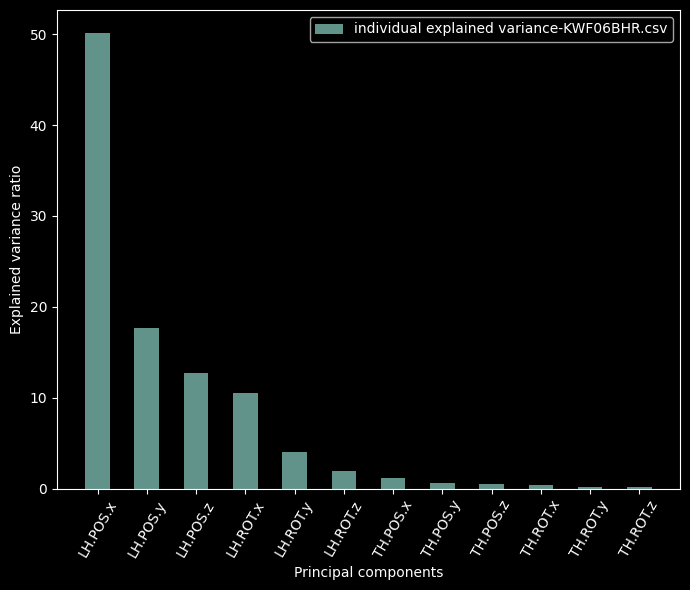

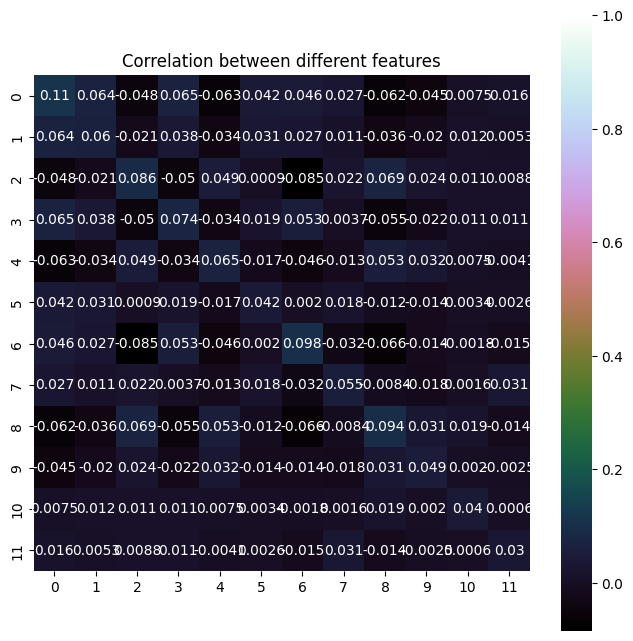

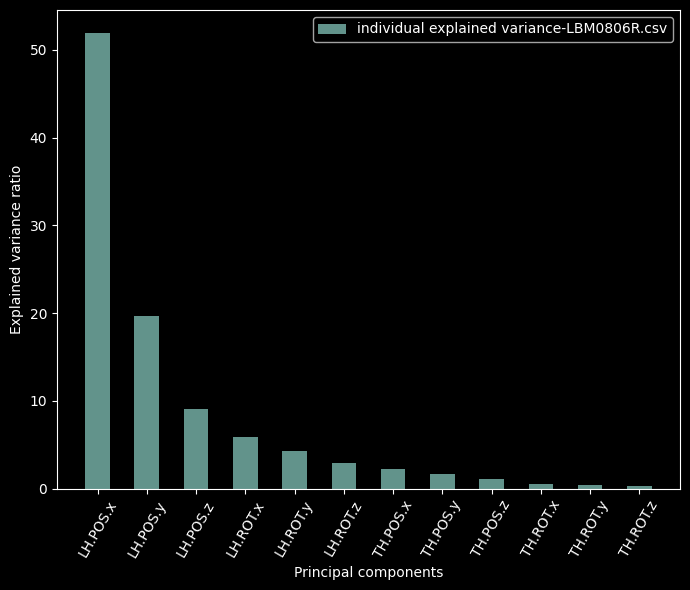

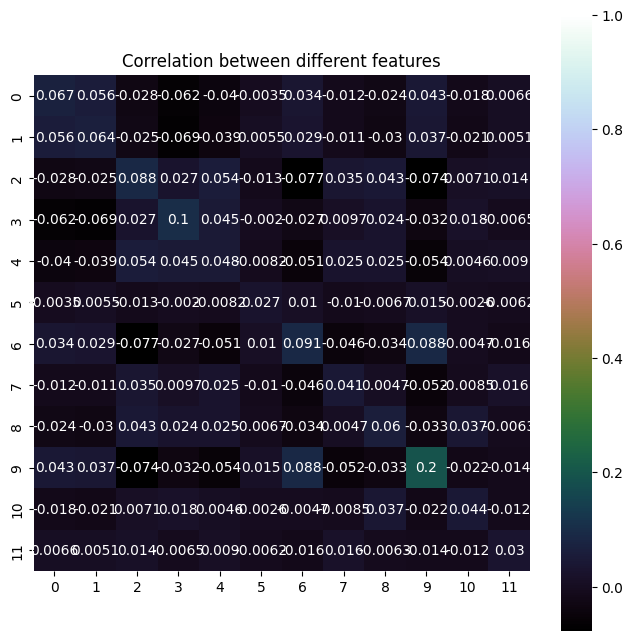

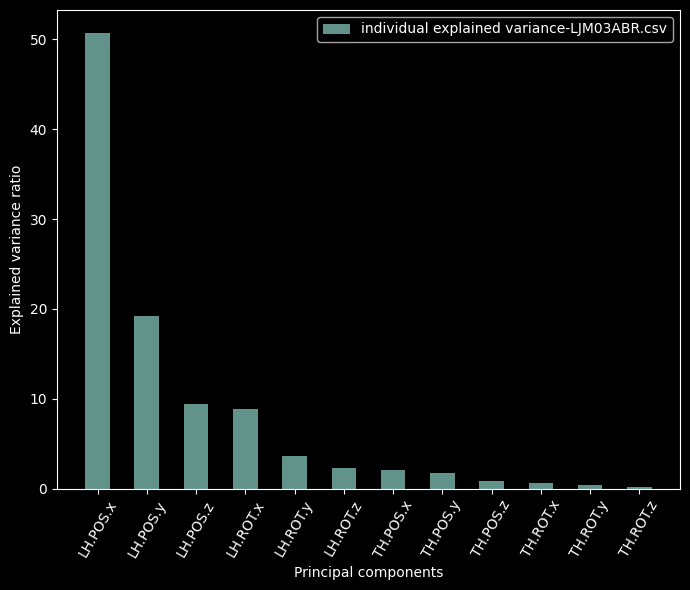

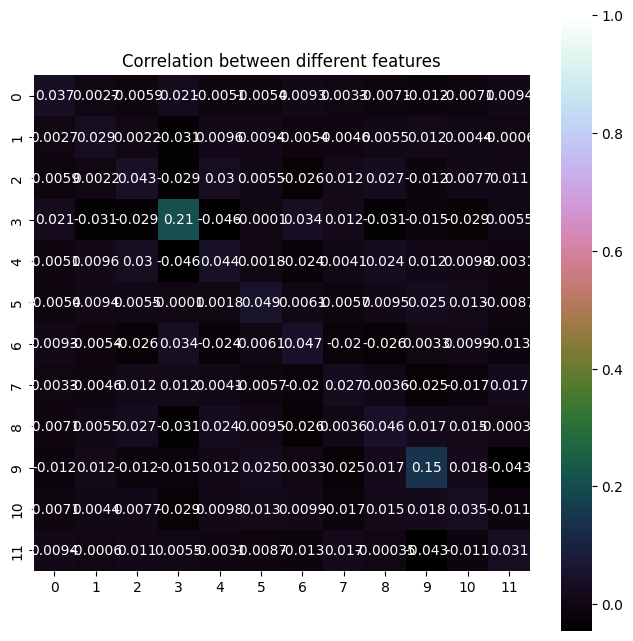

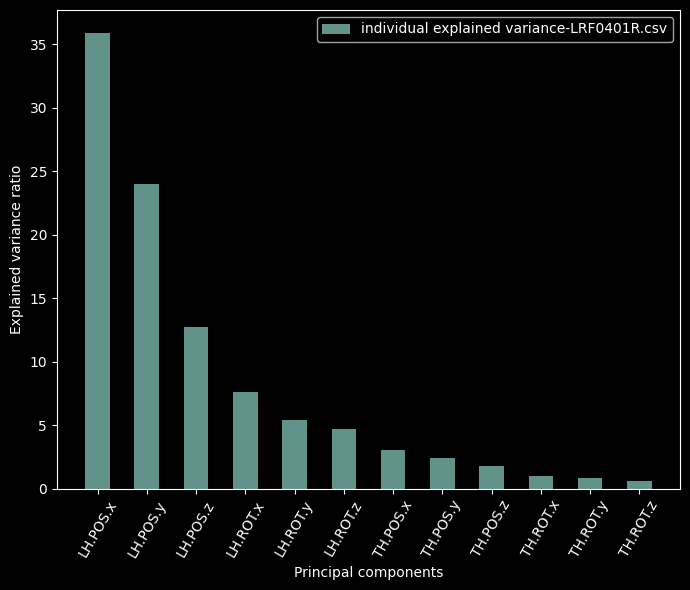

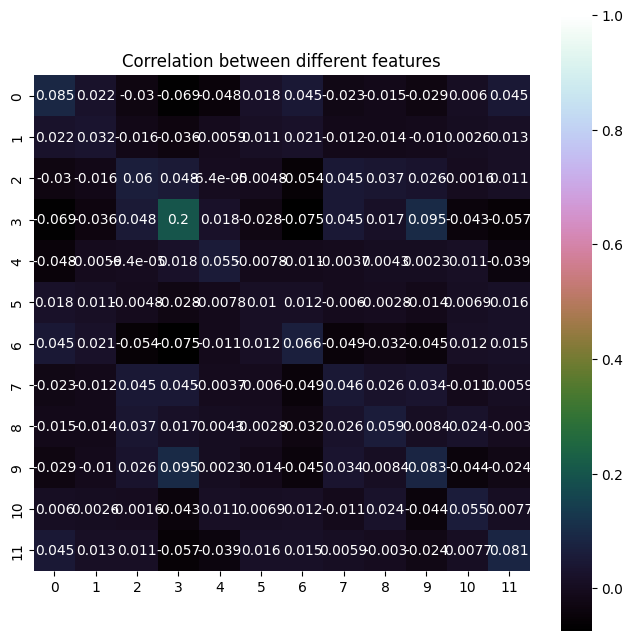

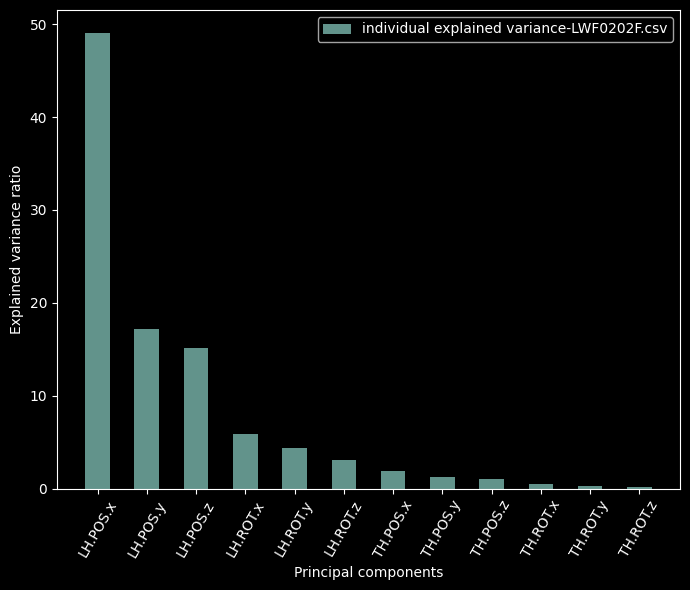

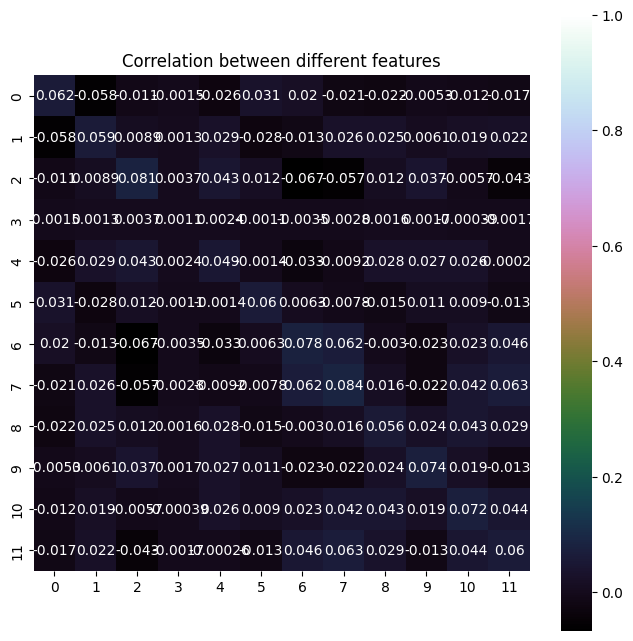

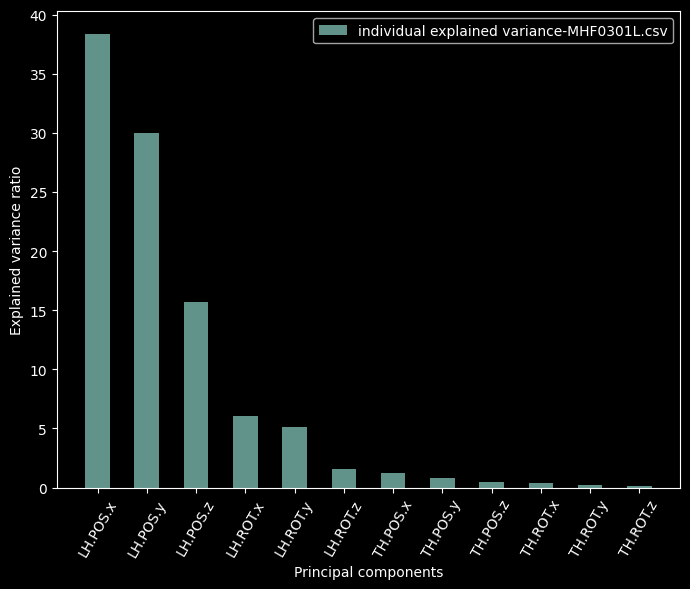

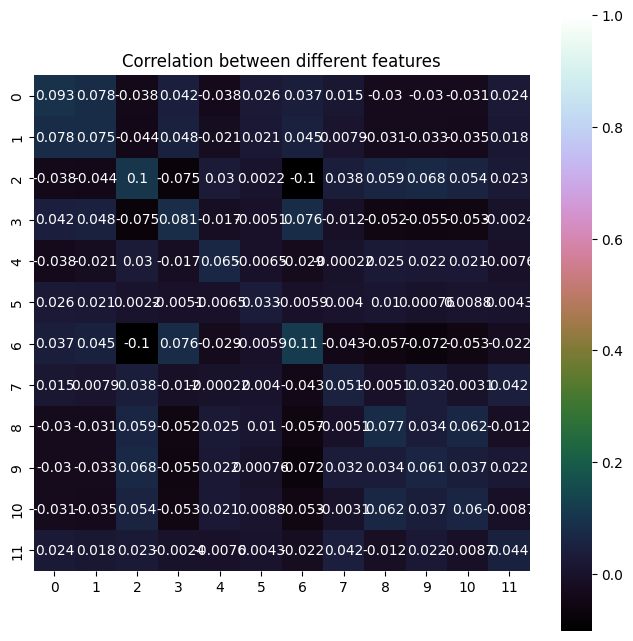

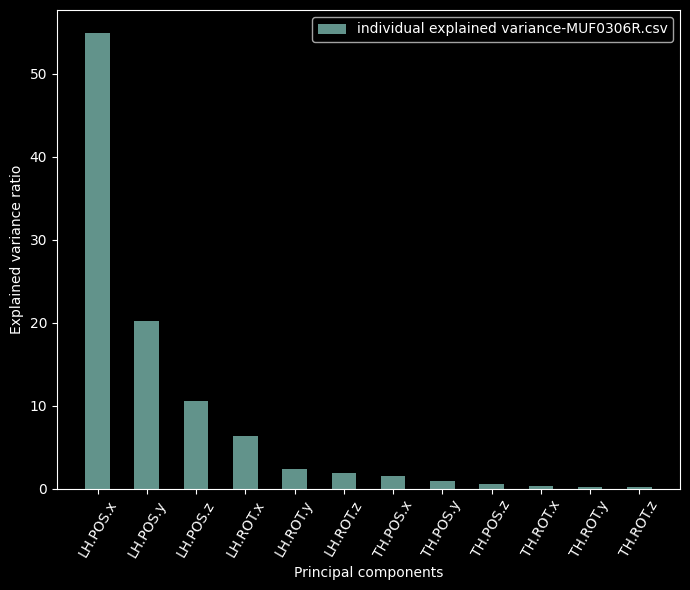

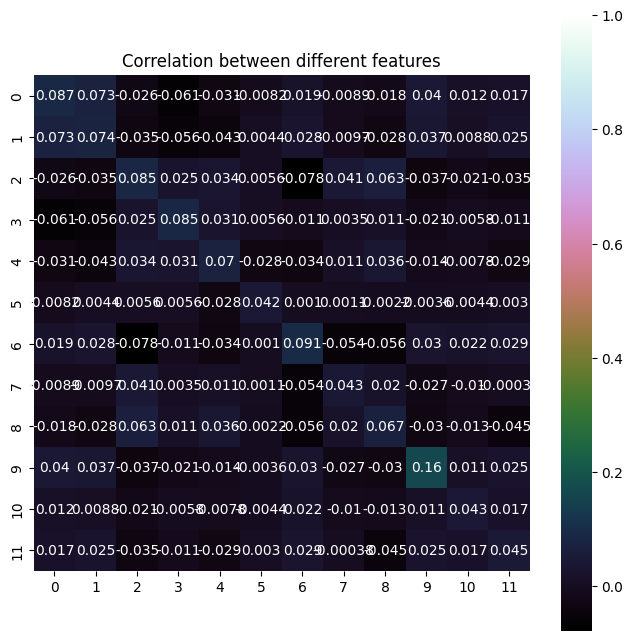

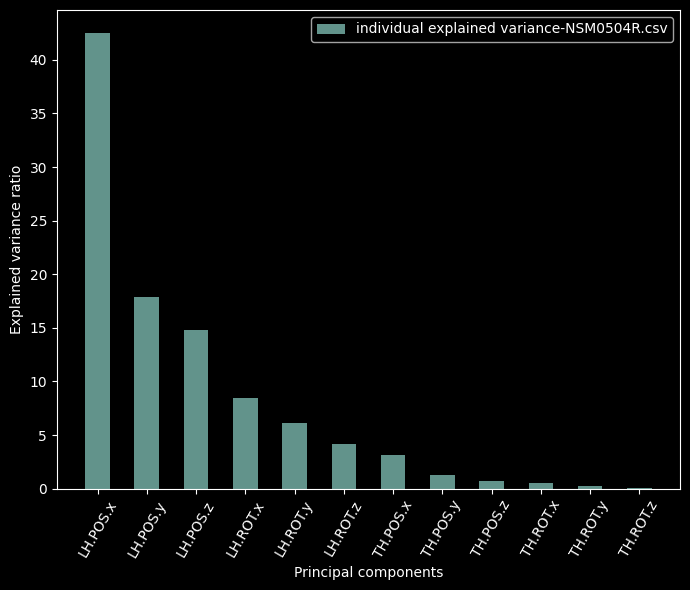

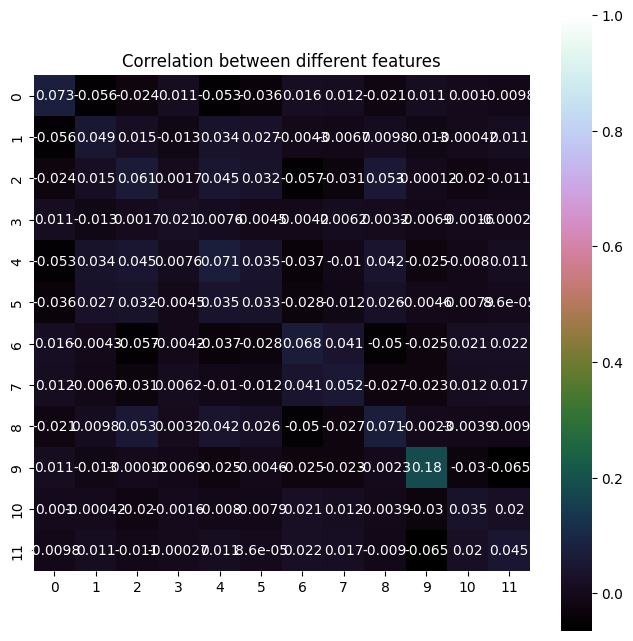

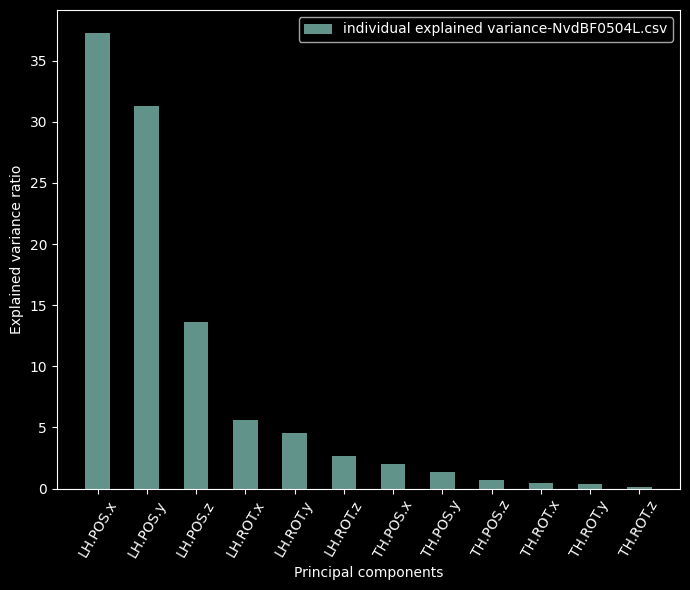

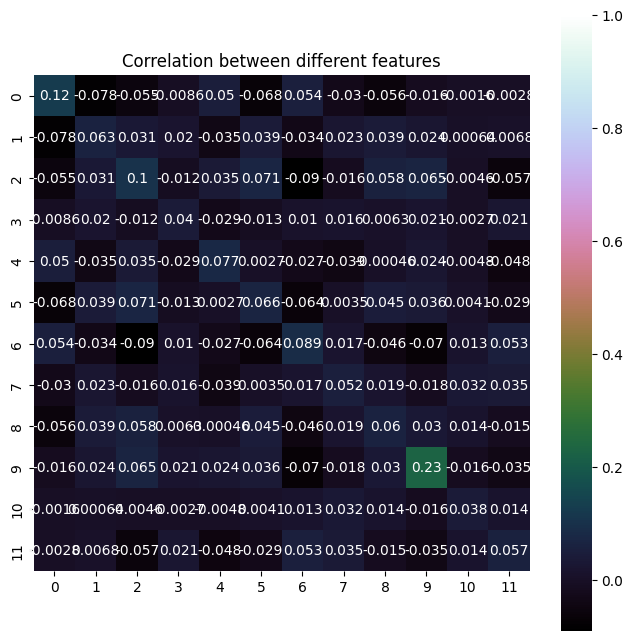

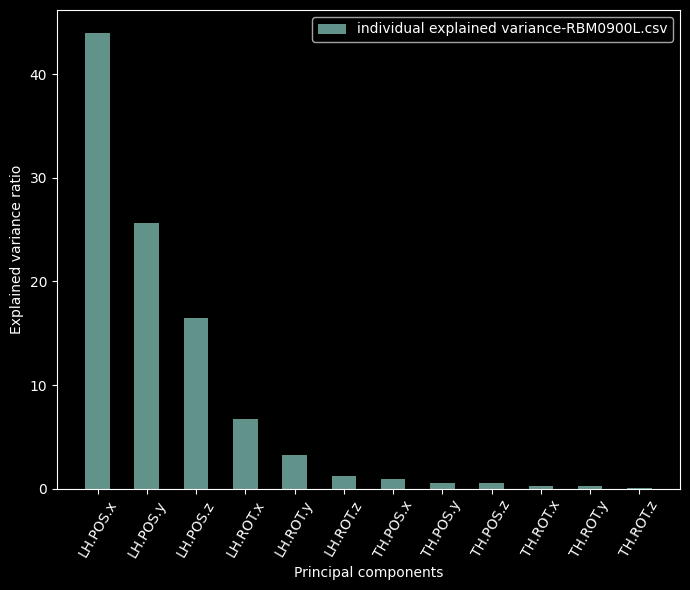

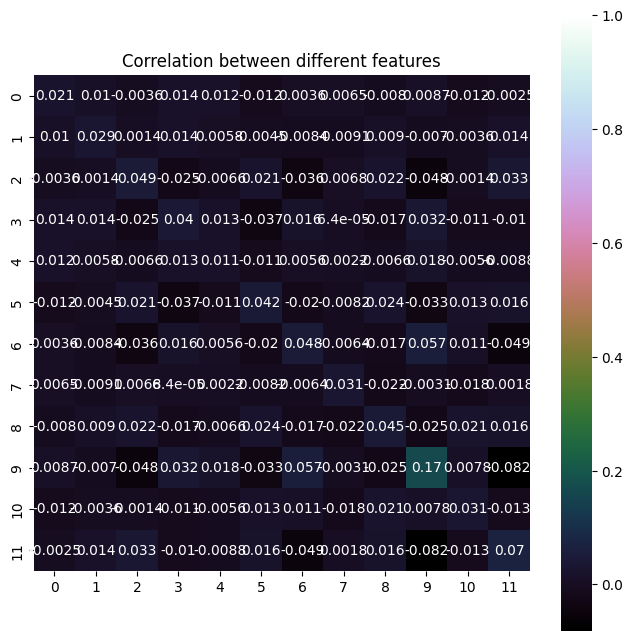

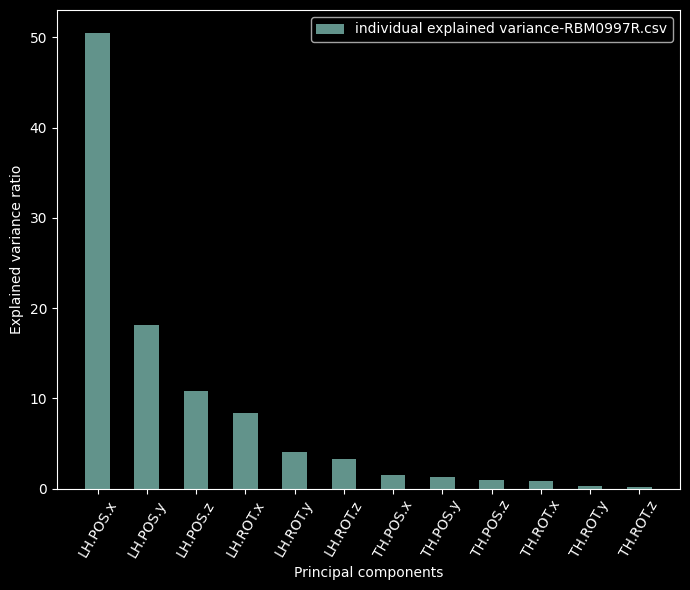

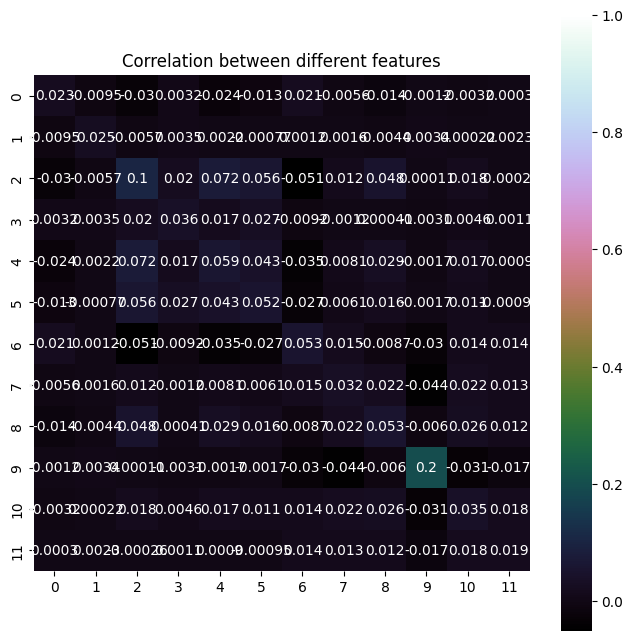

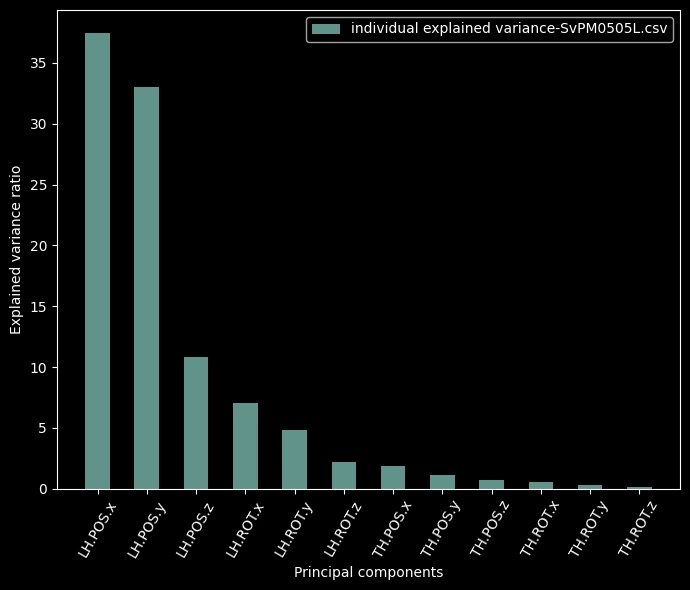

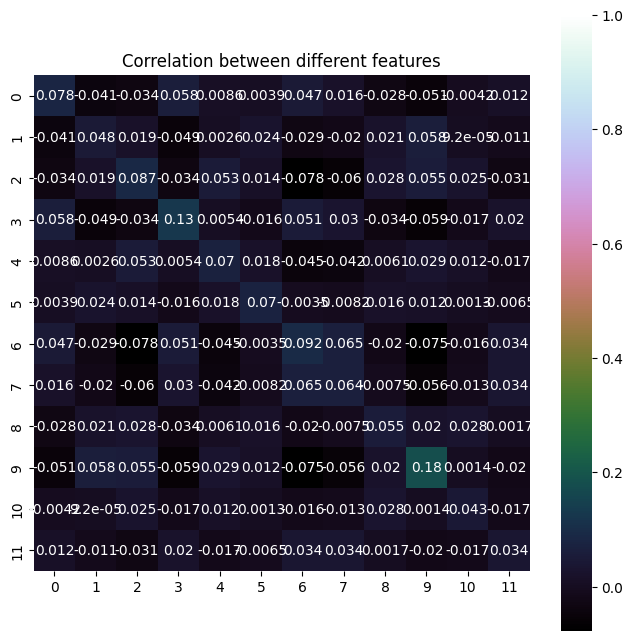

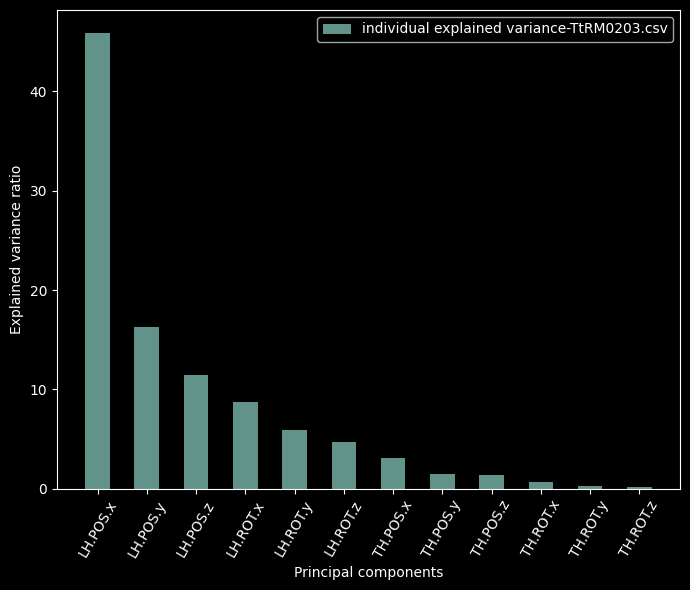

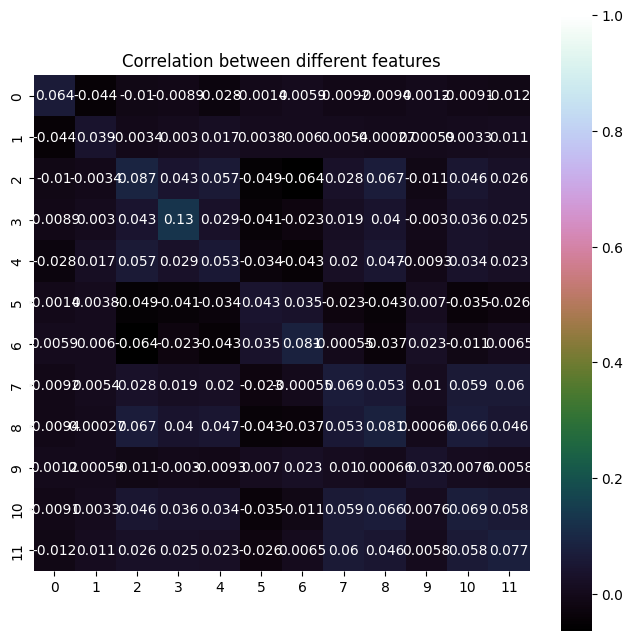

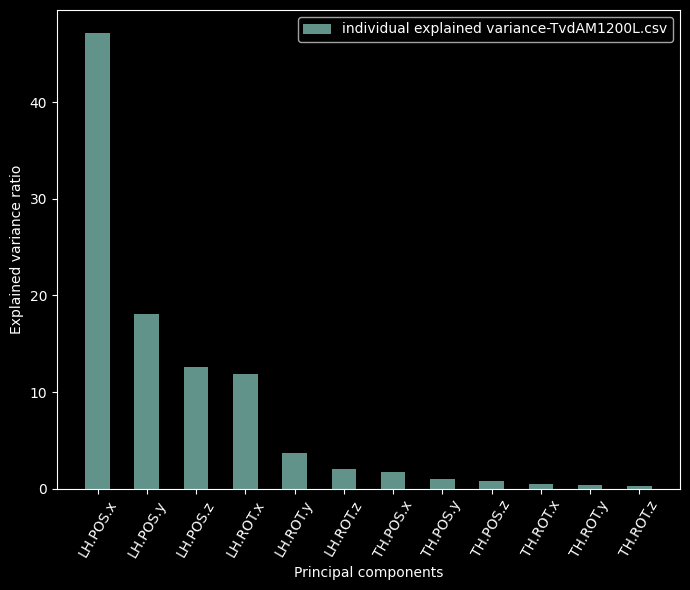

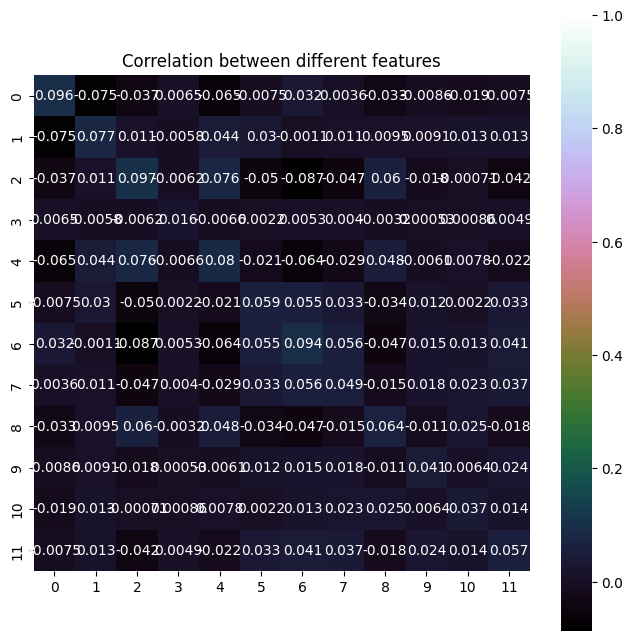

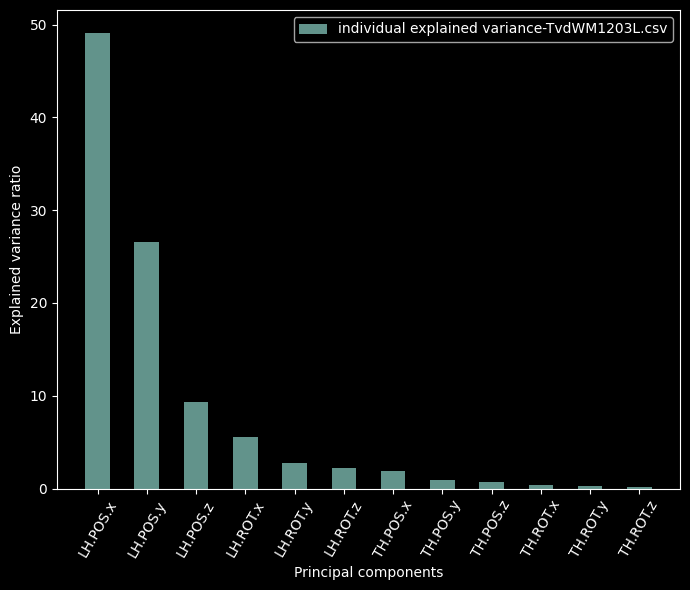

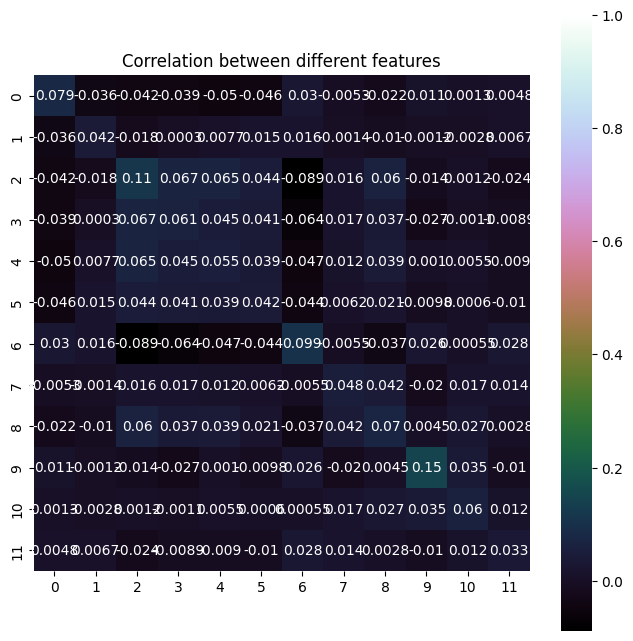

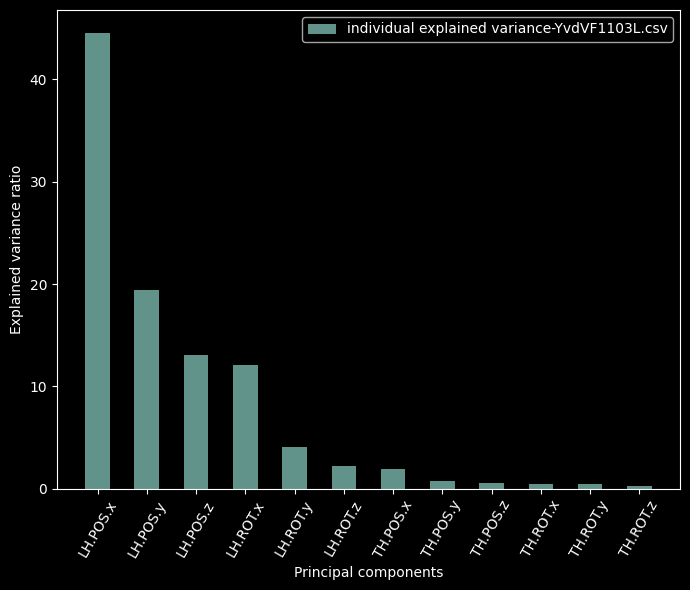

In [38]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import plotly.express as px

# dataset = pd.read_csv('/Users/taruna/Desktop/publication/Data/impaired-cp/AOF0802R.csv')
# pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")

rootdir = "/Users/taruna/Desktop/publication/Data/impaired-cp"
df_folder = []

csv_list = []

write_header = True
output_csv = 'combined.csv'
for filename in os.listdir(rootdir):
    f = os.path.join(rootdir, filename)
    if f.endswith('.csv'):
        path = os.path.basename(os.path.normpath(f))
        print('path')
        print(f)
        dataset = pd.read_csv(f)

        # dataset = dataset.iloc[:-5]
        # dataset['C'] = dfObject.C.str.replace(r"[a-zA-Z]",'')

        print(dataset)
        features =  ['LH.POS.x','LH.POS.y', 'LH.POS.z','LH.ROT.x', 'LH.ROT.y', 'LH.ROT.z', 'TH.POS.x', 'TH.POS.y','TH.POS.z','TH.ROT.x','TH.ROT.y','TH.ROT.z']

        X = dataset[features]

        print(np.shape(features))
        # X= np.array(X)
        print('eeeeeele')
        print(X)
        train_scaled = np.reshape(X, (X.shape[0], X.shape[1]))
        from sklearn.preprocessing import MinMaxScaler  # scaling the attributes 0-1

        scaler = MinMaxScaler(feature_range=(0, 1))
        train_scaled = scaler.fit_transform(X)
        train_scaled
        mean_vec = np.mean(train_scaled, axis=0)
        cov_mat = (train_scaled - mean_vec).T.dot((train_scaled - mean_vec)) / (train_scaled.shape[0] - 1)
        print('NumPy covariance matrix: \n%s' % np.cov(train_scaled.T))
        plt.figure(figsize=(8, 8))
        sns.heatmap(cov_mat, vmax=1, square=True, annot=True, cmap='cubehelix')
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)

        print('Eigenvectors \n%s' % eig_vecs)
        print('\nEigenvalues \n%s' % eig_vals)
        plt.title('Correlation between different features')
        print('Covariance matrix \n%s' % cov_mat)

        # dataset['features'].unique()
        
        from sklearn.decomposition import PCA

        # pca = PCA(n_components=1, svd_solver='arpack')
        # pca.fit(train_scaled)
        # PCA(n_components=1, svd_solver='arpack')
        # print(pca.explained_variance_ratio_)
        # print(pca.singular_values_)

        pca = PCA(n_components=3)
        components = pca.fit_transform(train_scaled)
        print('----pca----')
        print(pca)
        print(pca.explained_variance_ratio_)
        print('important features')

        total_var = pca.explained_variance_ratio_.sum() * 100
        print(abs(pca.components_))
        # import plotly.graph_objects as go
        # import plotly.express as px

        fig = px.scatter_3d(
            components, x=0, y=1, z=2,
            title=f'Total Explained Variance: {total_var:.2f}%',
            labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
        )
        # fig.show()

        loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

        fig = px.scatter(components, x=0, y=1, color=dataset['LH.POS.x'])



        for i, feature in enumerate(features):
            fig.add_shape(
                type='line',
                x0=0, y0=0,
                x1=loadings[i, 0],
                y1=loadings[i, 1]
            )
            fig.add_annotation(
                x=loadings[i, 0],
                y=loadings[i, 1],
                ax=0, ay=0,
                xanchor="center",
                yanchor="bottom",
                text=feature,
            )
        # fig.show()
        tot = sum(eig_vals)
        var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]


        for eigenvector in pca.components_:
            print(np.dot(eigenvector.T, np.dot(cov_mat, eigenvector)))
        # Visually confirm that the list is correctly sorted by decreasing eigenvalues
        print('Eigenvalues in descending order:')
        #  Make a list of (eigenvalue, eigenvector) tuples
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

        # Sort the (eigenvalue, eigenvector) tuples from high to low
        eig_pairs.sort(key=lambda x: x[0], reverse=True)

        for i in eig_pairs:
            print(i[0])


        with plt.style.context('dark_background'):
            plt.figure(figsize=(7, 6))
            plt.bar(features, var_exp, alpha=0.7, align='center',
                    label='individual explained variance-'+filename, width=.5)
            plt.xticks(rotation=60)
            plt.ylabel('Explained variance ratio')
            plt.xlabel('Principal components')
            plt.legend(loc='best')
            plt.tight_layout()
        # plt.show()

        plt.savefig(filename+'.png')
        
# pdf.close()
